In [1]:
library(tidyr)
library(dplyr)
library(tibble)
library(ggplot2)
library(stringr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
df <- read.csv("president_county_candidate.csv")

In [3]:
df$party <- as.factor(df$party)
head(df)

levels(df$party)

state,county,candidate,party,votes
Delaware,Kent County,Joe Biden,DEM,44518
Delaware,Kent County,Donald Trump,REP,40976
Delaware,Kent County,Jo Jorgensen,LIB,1044
Delaware,Kent County,Howie Hawkins,GRN,420
Delaware,Kent County,Write-ins,WRI,0
Delaware,New Castle County,Joe Biden,DEM,194238


[1] "ALI" "APV" "ASP" "BAR" "BFP" "BMP" "CST" "DEM" "GOP" "GRN" "IAP" "IND"
[13] "LIB" "LLC" "LLP" "NON" "OTH" "PRG" "PRO" "PSL" "REP" "SEP" "SWP" "UNA"
[25] "UTY" "WRI"

In [4]:
df <- select(df, -candidate)
df <-subset(df, party %in% c("DEM","REP","LIB","GRN"))



# Since there are multiple counties named the same thing, We can make an attribute that will combine the first two columns
# together and then parse them our later.

df$state_county <- as.factor(paste(df$state,df$county, sep = "_and_"))
df <- select(df, -state, -county)

head(df)


,party,votes,state_county
1,DEM,44518,Delaware_and_Kent County
2,REP,40976,Delaware_and_Kent County
3,LIB,1044,Delaware_and_Kent County
4,GRN,420,Delaware_and_Kent County
6,DEM,194238,Delaware_and_New Castle County
7,REP,87685,Delaware_and_New Castle County


In [5]:
summary(df)

     party          votes                   state_county  
 DEM    :4633   Min.   :      0   Alaska_and_ED 1 :    4  
 LIB    :4633   1st Qu.:     47   Alaska_and_ED 10:    4  
 REP    :4633   Median :    498   Alaska_and_ED 11:    4  
 GRN    :3034   Mean   :   8730   Alaska_and_ED 12:    4  
 ALI    :   0   3rd Qu.:   4010   Alaska_and_ED 13:    4  
 APV    :   0   Max.   :2486527   Alaska_and_ED 14:    4  
 (Other):   0                     (Other)         :16909  

In [6]:
newdf <- spread(df, key = party, value = votes)
head(newdf)

state_county,DEM,GRN,LIB,REP
Alabama_and_Autauga County,7450,NA,346,19764
Alabama_and_Baldwin County,24344,NA,1221,83055
Alabama_and_Barbour County,4772,NA,68,5605
Alabama_and_Bibb County,1982,NA,73,7508
Alabama_and_Blount County,2627,NA,209,24595
Alabama_and_Bullock County,3439,NA,19,1143


In [7]:
newdf <- separate(newdf, state_county, c("State","County") , sep = "_and_")
head(newdf, 50)

State,County,DEM,GRN,LIB,REP
Alabama,Autauga County,7450,NA,346,19764
Alabama,Baldwin County,24344,NA,1221,83055
Alabama,Barbour County,4772,NA,68,5605
Alabama,Bibb County,1982,NA,73,7508
Alabama,Blount County,2627,NA,209,24595
Alabama,Bullock County,3439,NA,19,1143
Alabama,Butler County,3953,NA,59,5448
Alabama,Calhoun County,15118,NA,548,34964
Alabama,Chambers County,6356,NA,140,8748
Alabama,Cherokee County,1619,NA,82,10562


In [8]:
newdf[is.na(newdf)] <- 0

In [9]:
parties <- c("DEM","GRN","LIB","REP")

In [10]:
parties

[1] "DEM" "GRN" "LIB" "REP"

In [11]:
newdf$winner <- parties[max.col(newdf[3:ncol(newdf)])]
head(newdf, 50)

State,County,DEM,GRN,LIB,REP,winner
Alabama,Autauga County,7450,0,346,19764,REP
Alabama,Baldwin County,24344,0,1221,83055,REP
Alabama,Barbour County,4772,0,68,5605,REP
Alabama,Bibb County,1982,0,73,7508,REP
Alabama,Blount County,2627,0,209,24595,REP
Alabama,Bullock County,3439,0,19,1143,DEM
Alabama,Butler County,3953,0,59,5448,REP
Alabama,Calhoun County,15118,0,548,34964,REP
Alabama,Chambers County,6356,0,140,8748,REP
Alabama,Cherokee County,1619,0,82,10562,REP


In [12]:
library(ggplot2)
all_states <- map_data("state")  

In [13]:
newdf3 <- select(newdf, -County, -winner)

In [14]:
newdf3 <- group_by(newdf3, State) %>% summarise_all(sum)

In [15]:
newdf3

State,DEM,GRN,LIB,REP
Alabama,843473,0,24994,1434159
Alaska,45758,910,3478,80999
Arizona,1571723,0,45394,1533268
Arkansas,417898,2947,13039,755820
California,8390640,53509,120136,4286488
Colorado,1753416,8535,50469,1335253
Connecticut,1045263,7369,20086,697599
Delaware,295413,2135,4979,199857
District of Columbia,258561,1302,1449,14449
Florida,5286727,14669,70058,5659910


In [16]:
newdf3$winner <- parties[max.col(newdf3[2:ncol(newdf3)])]
head(newdf3, 50)

State,DEM,GRN,LIB,REP,winner
Alabama,843473,0,24994,1434159,REP
Alaska,45758,910,3478,80999,REP
Arizona,1571723,0,45394,1533268,DEM
Arkansas,417898,2947,13039,755820,REP
California,8390640,53509,120136,4286488,DEM
Colorado,1753416,8535,50469,1335253,DEM
Connecticut,1045263,7369,20086,697599,DEM
Delaware,295413,2135,4979,199857,DEM
District of Columbia,258561,1302,1449,14449,DEM
Florida,5286727,14669,70058,5659910,REP


In [17]:
demwins <- subset(newdf3, winner == "DEM")
repwins <- subset(newdf3, winner == "REP")

In [18]:
blu <- tolower(as.vector(unique(demwins$State)))
blu

[1] "arizona"              "california"           "colorado"            
 [4] "connecticut"          "delaware"             "district of columbia"
 [7] "georgia"              "hawaii"               "illinois"            
[10] "maine"                "maryland"             "massachusetts"       
[13] "michigan"             "minnesota"            "nevada"              
[16] "new hampshire"        "new jersey"           "new mexico"          
[19] "new york"             "oregon"               "pennsylvania"        
[22] "rhode island"         "vermont"              "virginia"            
[25] "washington"           "wisconsin"

In [19]:
rd <- tolower(as.vector(unique(repwins$State)))
rd

[1] "alabama"        "alaska"         "arkansas"       "florida"       
 [5] "idaho"          "indiana"        "iowa"           "kansas"        
 [9] "kentucky"       "louisiana"      "mississippi"    "missouri"      
[13] "montana"        "nebraska"       "north carolina" "north dakota"  
[17] "ohio"           "oklahoma"       "south carolina" "south dakota"  
[21] "tennessee"      "texas"          "utah"           "west virginia" 
[25] "wyoming"

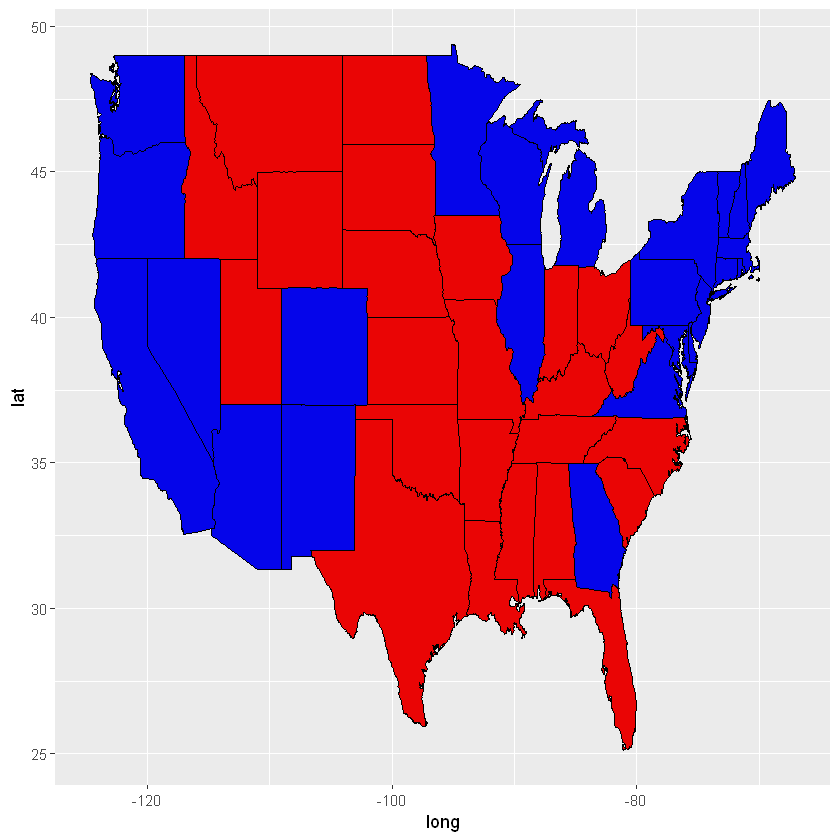

In [20]:
ggplot(all_states, aes(x=long, y=lat, group = group)) +
  geom_polygon(fill="blue", data = filter(all_states, region %in% blu)) +
  geom_polygon(fill="red", data = filter(all_states, region %in% rd)) + 
  geom_polygon(color = "black", alpha = 0.1) 

In [21]:
library(usmap)
library(ggplot2)
all_counties <- map_data("county")

Warning message:
"package 'usmap' was built under R version 3.6.3"

In [22]:
all_counties$merge <- paste(all_counties$region,all_counties$subregion, sep = "_and_")
all_counties$merge <- gsub(" ","",all_counties$merge)
all_counties$merge <- gsub(".", "", all_counties$merge, fixed = TRUE)
all_counties$merge <- gsub("'", '', all_counties$merge)

In [23]:
newdf$County <- tolower(gsub(paste0(c("County","Parish"),collapse = "|"),"", newdf$County))

In [24]:
newdf$merge <- tolower(paste(newdf$State, newdf$County, sep = "_and_"))
newdf$merge <- gsub(" ","",newdf$merge)
newdf$merge <- gsub(".", "", newdf$merge, fixed = TRUE)
newdf$merge <- gsub("'", '', newdf$merge)

In [25]:
demwins <- subset(newdf, winner == "DEM")
repwins <- subset(newdf, winner == "REP")

blu <- tolower(as.vector(unique(demwins$merge)))
rd <- tolower(as.vector(unique(repwins$merge)))

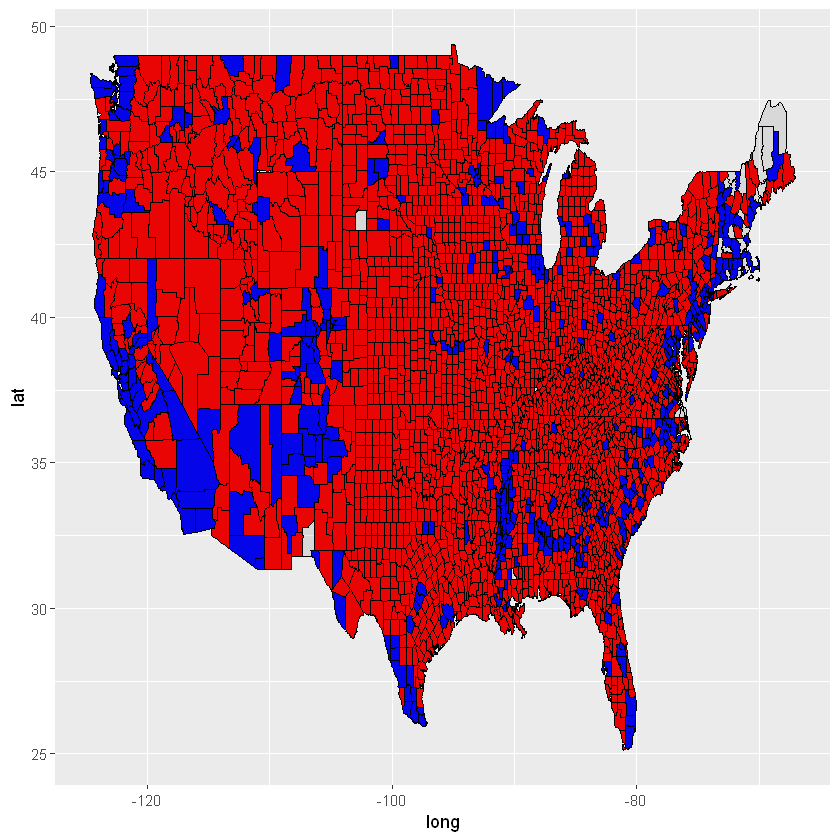

In [26]:
ggplot(all_counties, aes(x=long, y=lat, group = group)) +
  geom_polygon(fill="blue", data = filter(all_counties, merge %in% blu)) +
  geom_polygon(fill="red", data = filter(all_counties, merge %in% rd)) +
  geom_polygon(color = "black", alpha = 0.1) 

In [27]:
as.data.frame(unique(subset(all_counties,!(merge %in% as.vector(newdf$merge)))$merge))

"unique(subset(all_counties, !(merge %in% as.vector(newdf$merge)))$merge)"
connecticut_and_middlesex
districtofcolumbia_and_washington
maine_and_androscoggin
maine_and_aroostook
maine_and_kennebec
maine_and_piscataquis
maine_and_sagadahoc
maine_and_somerset
massachusetts_and_berkshire
massachusetts_and_bristol
